In [18]:
from em_improved_version import EMImprovedVersion
from utils import read_image, plot, error, create_image, get_image
import matplotlib.pyplot as plt
import numpy as np

In [11]:
K = [1, 2, 4, 8, 16, 32, 64]

path = "im.jpg"

likelihoods_final_ims = []
errors = []
for k in K:
    l_im = []
    im, shape, mode = read_image(path)

    em = EMImprovedVersion(im, k)

    Ls = em.EM_algorithm()
    l_im.append(Ls)
    
    final_im = create_image(em.G, em.M)
    err = error(im, final_im, em.N)
    errors.append(err)
    final_im = get_image(final_im, shape, mode)
    l_im.append(final_im)
    
    likelihoods_final_ims.append(l_im)


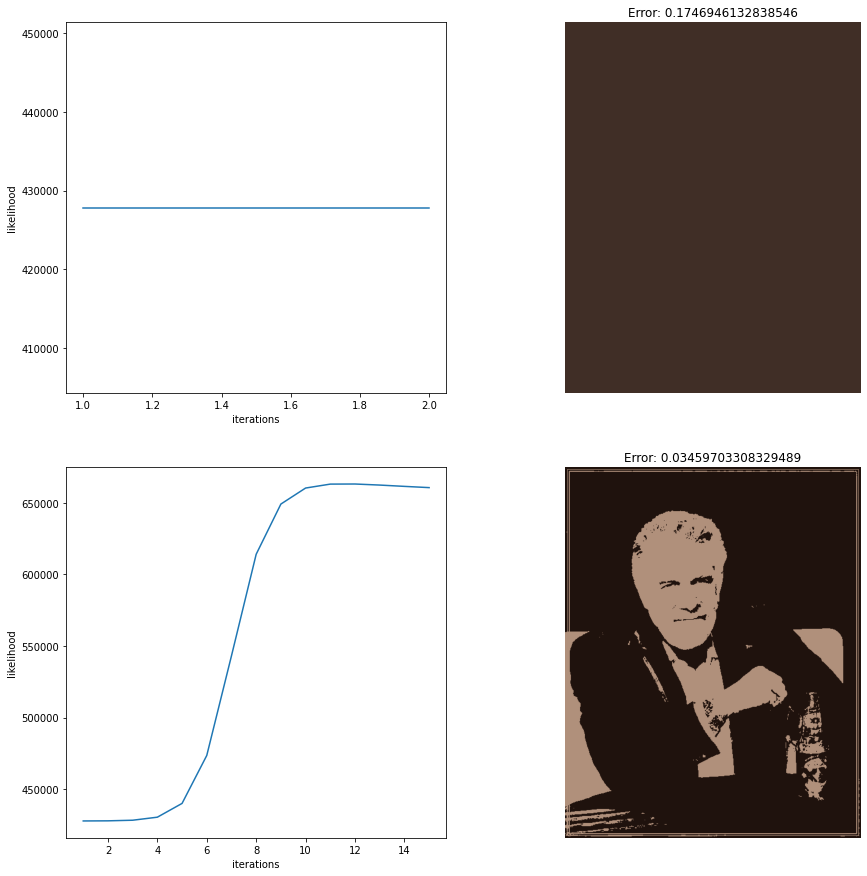

In [40]:
fig, axs = plt.subplots(len(K), 2, figsize=(15,15))

for i in range(0, len(K)):
    # plot likelihoods
    likelihoods = likelihoods_final_ims[i][0]
    axs[i,0].set_ylabel('likelihood')
    axs[i,0].set_xlabel('iterations')
    x = range(1, len(likelihoods) + 1)
    y = likelihoods
    axs[i,0].plot(x, y)
    
    # plot 
    axs[i,1].axis('off')
    axs[i,1].imshow(likelihoods_final_ims[i][1])
    # add error as a title
    axs[i,1].title.set_text('Error: '+str(errors[i]))